In [7]:
from build import build_discriminator, build_generator
import numpy as np
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical
%matplotlib inline

In [8]:
LATENT_SIZE = 100
CLASS_NUM = 10

## build model and load weights

In [9]:
discriminator_weights_path = './log/params_discriminator_epoch_399.hdf5'
generator_weights_path = './log/params_generator_epoch_399.hdf5'

they are trained with fashion_mnist

In [10]:
discriminator = build_discriminator()
generator = build_generator(latent_size=LATENT_SIZE)

In [11]:
discriminator.load_weights(discriminator_weights_path)
generator.load_weights(generator_weights_path)

## generate 100 images from uniform noise and show them

In [12]:
noise = np.random.uniform(-1, 1, size=(100, LATENT_SIZE))
sampled_labels = np.array([[i] * 10 for i in range(10)]).flatten()
sampled_labels = to_categorical(sampled_labels, num_classes=CLASS_NUM)
generated_images = generator.predict([noise, sampled_labels], verbose=False)

In [13]:
img = (np.concatenate([r.reshape(-1, 28) for r in np.split(generated_images, 10)], axis=-1) * 127.5 + 127.5).astype(np.uint8)
img = np.clip(img, 0, 255)

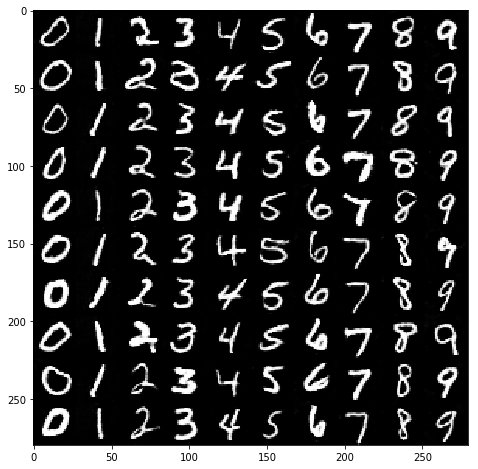

In [14]:
plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.gray()
plt.show()